## Generalidades
y = f(x) =  mx +b

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)

#### se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.

In [6]:
# Importando las libreríass a utilizar
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Importando Data a utilizar en el proyecto:

data_total = np.load('C:/Users/Gary/Google Drive/Universidad/MAESTRIA/Data Science/Año 1/1. Trimestre I/2. Ciencia de Datos en Python/Tareas/Proyecto Final/proyecto_data/proyecto_training_data.npy')
data_total.shape


(1460, 6)

In [8]:
#utilizando Slicing para dividir el dataset
#Se usará el 80% para los "Datos de entrenamiento"
Parte1 = round(len(data_total)*0.8)
data_entrenamiento = (data_total[0:Parte1,0:6])

#Se usará el 20% para "Datos de validación y pruebas"
Parte2 = round(len(data_total)*0.2)
data_validacion = (data_total[0:Parte2,0:6])

#Validacion de las dos partes:
print("Data Total: ")
print(data_total.shape)
print("Data Entrenamiento: ")
print(data_entrenamiento.shape)

print("Data Validacion: ")
print(data_validacion.shape)


Data Total: 
(1460, 6)
Data Entrenamiento: 
(1168, 6)
Data Validacion: 
(292, 6)


In [9]:
#Análisis Exploratorio de Datos:
#Media de las variables
numero = 0
while numero < 6:
    print("Media Columna: ", numero)
    print(round(np.mean(data_entrenamiento[:,numero]),2))
    print("Valor Maximo Columna: ", numero)
    print(round(np.max(data_entrenamiento[:,numero]),2))
    print("Valor Minimo Columna: ", numero)
    print(round(np.min(data_entrenamiento[:,numero]),2))
    print("Rango Columna ", numero)
    print(round(np.ptp(data_entrenamiento[:,numero]),2))
    print("Desvacion Estandard Columna: ", numero)
    print(round(np.std(data_entrenamiento[:,numero]),2))

    numero+=1
    

Media Columna:  0
180590.28
Valor Maximo Columna:  0
755000.0
Valor Minimo Columna:  0
34900.0
Rango Columna  0
720100.0
Desvacion Estandard Columna:  0
78781.95
Media Columna:  1
6.1
Valor Maximo Columna:  1
10.0
Valor Minimo Columna:  1
1.0
Rango Columna  1
9.0
Desvacion Estandard Columna:  1
1.38
Media Columna:  2
1156.32
Valor Maximo Columna:  2
3228.0
Valor Minimo Columna:  2
334.0
Rango Columna  2
2894.0
Desvacion Estandard Columna:  2
373.62
Media Columna:  3
6.49
Valor Maximo Columna:  3
14.0
Valor Minimo Columna:  3
2.0
Rango Columna  3
12.0
Desvacion Estandard Columna:  3
1.61
Media Columna:  4
1971.45
Valor Maximo Columna:  4
2010.0
Valor Minimo Columna:  4
1875.0
Rango Columna  4
135.0
Desvacion Estandard Columna:  4
29.94
Media Columna:  5
nan
Valor Maximo Columna:  5
nan
Valor Minimo Columna:  5
nan
Rango Columna  5
nan
Desvacion Estandard Columna:  5
nan


C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

<AxesSubplot:ylabel='Density'>

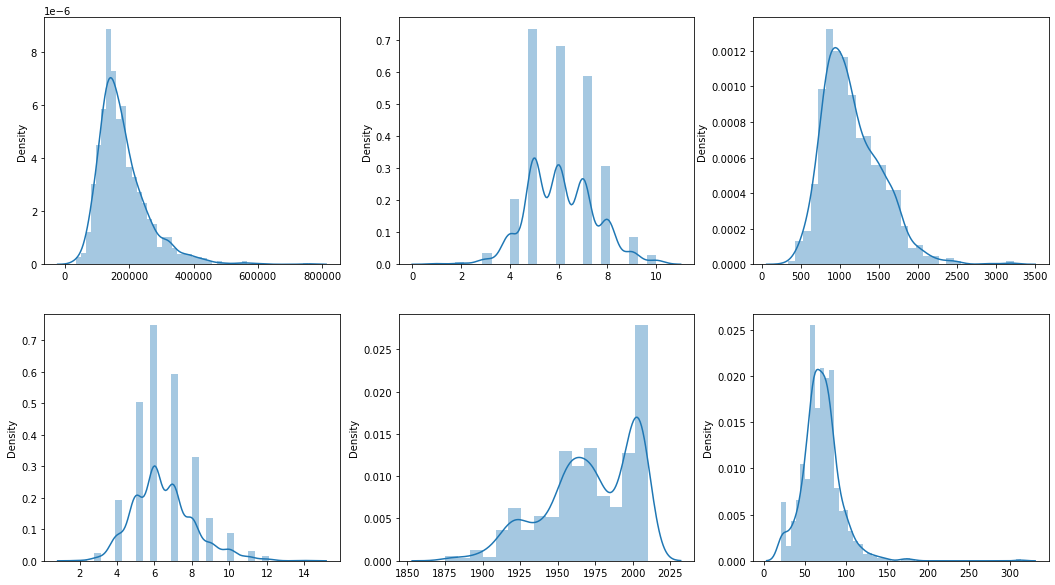

In [10]:
fig, ae = plt.subplots(2,3, figsize=(18,10))
sns.distplot(data_entrenamiento[:,0],ax=ae[0,0])
sns.distplot(data_entrenamiento[:,1],ax=ae[0,1])
sns.distplot(data_entrenamiento[:,2],ax=ae[0,2])
sns.distplot(data_entrenamiento[:,3],ax=ae[1,0])
sns.distplot(data_entrenamiento[:,4],ax=ae[1,1])
sns.distplot(data_entrenamiento[:,5],ax=ae[1,2])

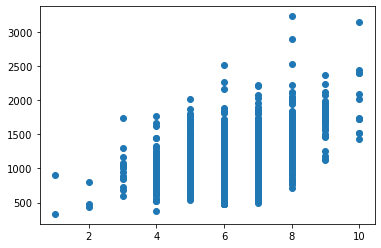

In [11]:
plt.scatter(data_entrenamiento[:,1],data_entrenamiento[:,2])

C:\Users\Gary\anaconda3\envs\py_galileo_2021\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


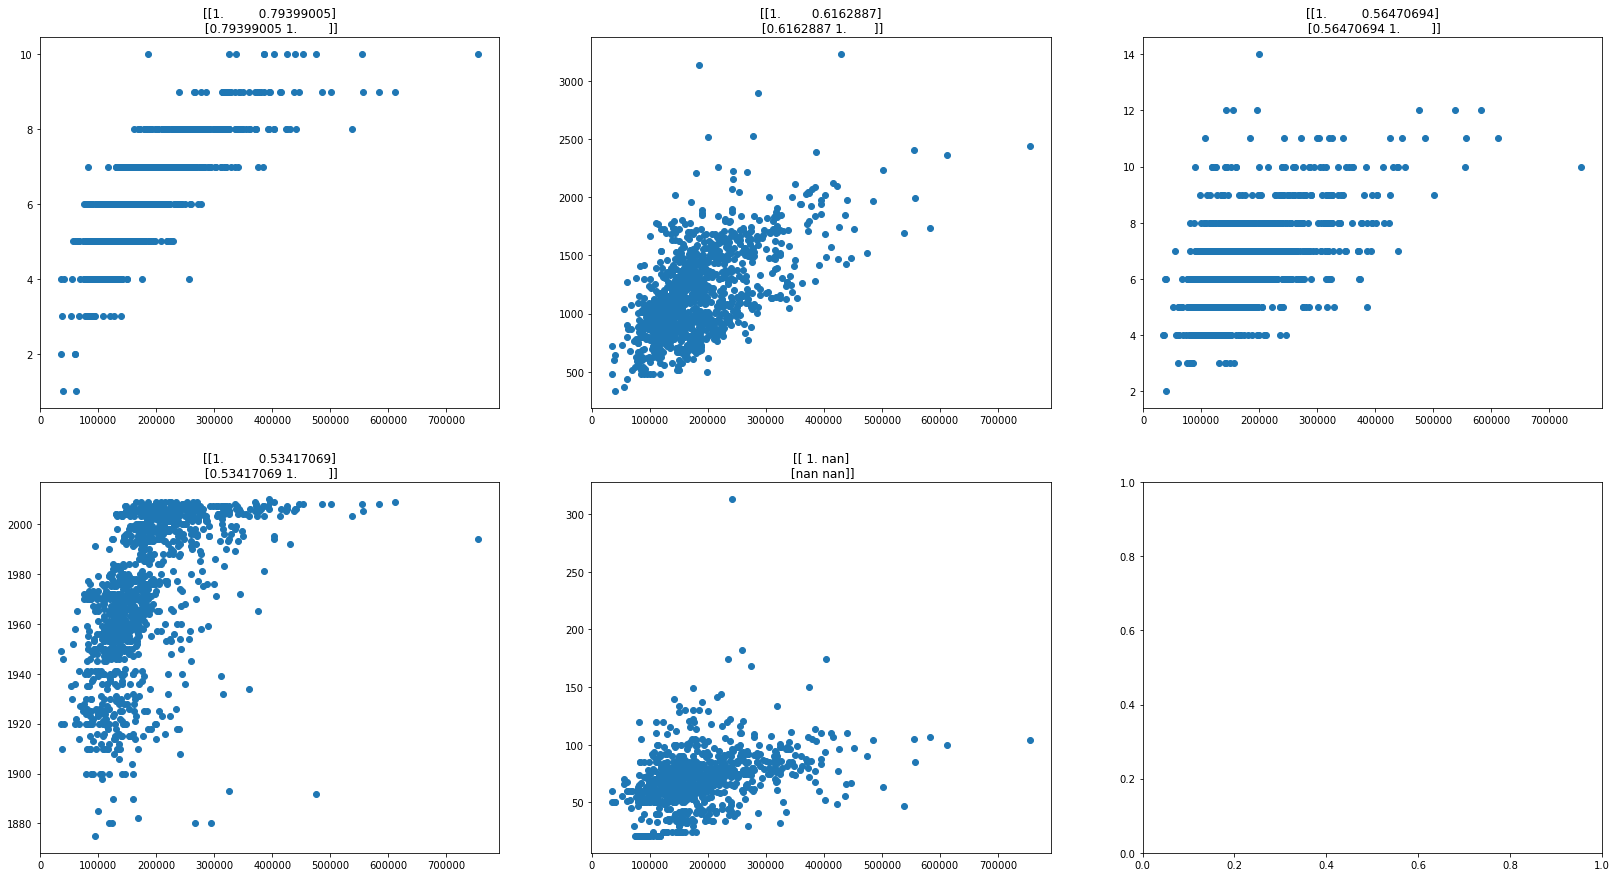

In [12]:
numero = 0
while numero < 1 :
    
    fig, ae = plt.subplots(2,3, figsize=(28,15))
    numero2 = 0
    #rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,0])
    #ae[0,0].title.set_text(rela)
    #ae[0,0].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,0])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,1])
    ae[0,0].title.set_text(rela)
    ae[0,0].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,1])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,2])
    ae[0,1].title.set_text(rela)
    ae[0,1].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,2])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,3])
    ae[0,2].title.set_text(rela)
    ae[0,2].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,3])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,4])
    ae[1,0].title.set_text(rela)
    ae[1,0].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,4])
    
    rela = np.corrcoef(data_entrenamiento[:,numero],data_entrenamiento[:,5])
    ae[1,1].title.set_text(rela)
    ae[1,1].scatter(data_entrenamiento[:,numero],data_entrenamiento[:,5])
    numero+=1

### Crear una función para entrenar un modelo de regresión lineal de una variable y = mx +b.



In [13]:
def func_proyecto(x,y,epo,print_flag,lr_rate):
  
    vect_1 = np.ones_like(x)
    grad_m = np.zeros_like(x)
    error_array = np.array([0,0])
    i_carga = np.array([0,0])
    

    valores_m_b= np.array([[0.000,0.0000]])
    vector = np.vstack((x,vect_1))
    y_modelo = np.array([[0.000,0.0000,0.000,0.000]])
    y_modelo1 = np.array([[0.000,0.0000,0.000]])
        
    #Multiplicacion por cada epoch:
    for i in range (0,epo):
        #La formula de Yhat = mx+b
        cont_global = 0 #sirve para guardar en el array de la formula
        yhat = np.matmul(valores_m_b,vector)
        #print("Esto es yhat", yhat)
        yhat.transpose
        error = np.power((yhat-y),2)/2
        error_prom = np.average(error)
    
        val = np.array([i,error_prom])
        #print("error_prom", error_prom)
        error_array = np.vstack((error_array,val))
                 
              
        grad_m = (yhat-y)*x
        #print("Gradm",grad_m)
        grad_b = (yhat-y)
        #print("Gradb",grad_b)
        grad_prom_m = np.average(grad_m)
        #print("grad_prom_m", grad_prom_m)
        grad_prom_b = np.average(grad_b)
        #print("grad_prom_b", grad_prom_b)
        param_m = valores_m_b[:,0]-lr_rate*grad_prom_m
        #print("Param_m", param_m)
        param_b = valores_m_b[:,1]-lr_rate*grad_prom_b
        #print("Param_b",param_b)
    
    
        #Y modelo entrenado en el tiempo, se guarda el numero de iteración y el valor de la formula:
        #m y b
       
        t=0
        for t in range(0,len(param_m)):
            i_carga[cont_global+t] = i
        
        y_modelo_1 = np.stack((param_m, param_b), axis = -1)
        #print("y_modelo1",y_modelo_1)
        
        y_modelo = np.vstack((y_modelo,(np.append(i_carga, y_modelo_1))))
        #print(y_modelo)
        #---------------------------------------------
    
    
    
    
        valores_m_b[:,0] = param_m
        valores_m_b[:,1] = param_b
        cont_global+=1

        
        if (i+1)%print_flag == 0 and i > 0:
            print("Error: ", error_prom)
    y_modelo = y_modelo[1:,:]
    #print("ymodelo final", y_modelo)
    return (error_array, y_modelo)               


In [14]:
#Aqui hay que probar lo del excel para ver como funciona
error_val, modelo = func_proyecto([65,80,68],[208.5,181.5,223.5],10,2,0.0001)

print(modelo)

Error:  5542.5714866175
Error:  885.8178756090729
Error:  613.838209046619
Error:  597.951493435833
Error:  597.0218999895303
[[0.         0.         1.44235    0.02045   ]
 [1.         0.         2.1514083  0.03065727]
 [2.         0.         2.49997979 0.03582921]
 [3.         0.         2.67133568 0.03852577]
 [4.         0.         2.75557222 0.04000543]
 [5.         0.         2.79698082 0.04088687]
 [6.         0.         2.81733517 0.04147421]
 [7.         0.         2.82733924 0.04191699]
 [8.         0.         2.83225509 0.04228869]
 [9.         0.         2.83466958 0.04262545]]


In [15]:
#Fución que grafica el cambio del error
def tiempo_error(val_error):

    x = val_error[:,0]
    y = val_error[:,1]
    x_n = x[1:(len(x))]
    y_n = y[1:(len(y))]

    plt.plot(x_n,y_n)
    plt.title("Cambio del error respecto a su iteracion")
    plt.xlabel('Iteracion')
    plt.ylabel('Error')
    plt.show

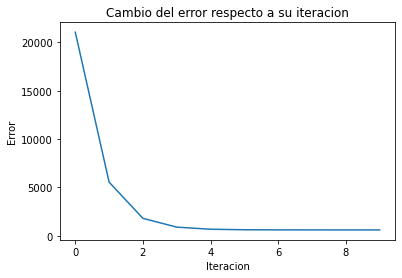

In [16]:
tiempo_error(error_val)

In [24]:
#Esta función no la estoy utilizando, no la borro por si la necesito.
def modelo_tiempo1(modelo, iter):
    numerov=0
    #Seleccionando los valores que vamos a imprimir
    fig1, ae1 = plt.subplots(1,1, figsize=(28,15))
       
    #print("modelo", modelo)
    #print("validacion m,", modelo[1,2], "Validacion b", modelo[1,3])
    for  val  in range(len(modelo)):
        if modelo[val,0:1] > 0:
            if modelo[val,0:1] % iter == 0 :
                
                ae1.scatter(modelo[val,2], modelo[val,2], c='black')
                line = mlines.Line2D([0, 1], [0, 1], color='blue')
                transform = ae1.transAxes
                line.set_transform(transform)
                ae1.add_line(line)


In [36]:
def modelo_tiempo(modelo,iter):
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    for  val  in range(len(modelo)):
        if modelo[val,0:1] > 0:
            if modelo[val,0:1] % iter == 0 :
                #print("y", modelo[val,3])
                plt.scatter(modelo[val,2], modelo[val,3],  color='black')
                
            
    plt.plot(modelo[:,2], modelo[:,3], color='blue', linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()

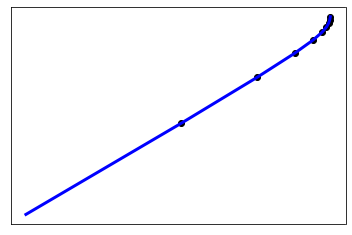

In [37]:

modelo_tiempo(modelo, 1)



In [ ]:
#la variable x = 0. la variable y elegida con más correlación #2 y #5.